## Basic NN using Numpy and Random data

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D 

In [2]:
# Declare size of taining set
observations = 1000

# Generate random data
x = np.random.uniform(low=-10, high=10, size=(observations,1))
z = np.random.uniform(-10, 10, (observations,1))

# Generate input matrix
inputs = np.column_stack((x,z))
print(inputs.shape)

(1000, 2)


In [3]:
# Generate targets using simple linear function 2x - 3z + 5 + <noise>
# Add some random noise
noise = np.random.uniform(-1, 1, (observations,1))
targets = 2*x - 3*z + 5 + noise
print(targets.shape)

(1000, 1)


#### Plotting the training data

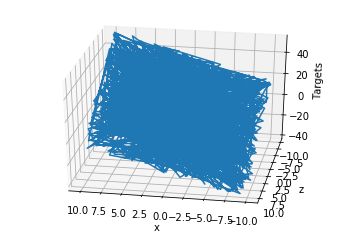

In [4]:
# Reshape targets to generate proper proper 3d plot
# We reshape and take as arguments the dimensions in which we want to fit the object 
targets = targets.reshape(observations,)

# Create a plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') # Method for 3d plot
ax.plot(x,z,targets)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Targets')


# Manipulate viewing angles by changing values of azim parameter
ax.view_init(azim=100)

# Reshape into original dimensions
targets = targets.reshape(observations,1)

In [5]:
# Initialize weights and biases randomly in a small range, denoted by init_range

init_range = 0.1

# Dimensions of weight matrix are k x m, where k = number of input and m = number of outputs
# In this case, 2 inputs (x and z) and 1 output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print(weights)
print(biases)

[[0.00927122]
 [0.06607308]]
[0.05999356]


In [6]:
# Learning rate
learning_rate = 0.02

In [7]:
# Training

for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations # Loss function L2-norm, divided by 2 as per convention
    print(loss)
    
    # Scaling deltas the same as loss function helps achieve the desired decrement
    deltas_scaled = deltas / observations
    
    # Gradient descent applied on weights and biases
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
print(weights, biases)

233.05749638886633
37.7519629974063
14.37593235537934
11.2175228834025
10.469717829903912
10.024476029705108
9.629708700279995
9.254549051895381
8.894724616620408
8.549202074278188
8.217363030812171
7.898659424865718
7.592570542124744
7.298596979440435
7.016259187790197
6.745096610090042
6.484666919936569
6.234545298822369
5.994323743005476
5.763610397945094
5.542028919097558
5.329217858014758
5.124830072741652
4.928532161550877
4.740003919090732
4.5589378140593375
4.385038487553019
4.218022271270528
4.057616724787249
3.903560191144557
3.755601370029376
3.6134989078477457
3.477021004023666
3.3459450328810436
3.2200571804919296
3.099152095898663
2.983032556140997
2.8715091445417857
2.7643999417264538
2.661530228872215
2.5627322027029913
2.467844701765127
2.3767129435373735
2.289188271946323
2.2051279148754537
2.124394751272191
2.046857087473118
1.9723884423824505
1.9008673411533716
1.8321771170356638
1.7662057210664028
1.7028455392933042
1.6419932172325329
1.5835494912746624
1.527419026

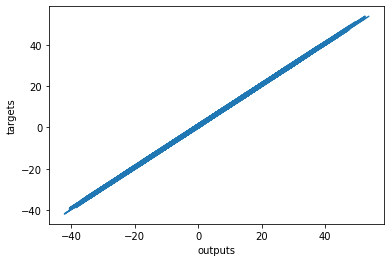

In [8]:
# Plot the outputs vs targets

plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()